# Visualize SSP

Using chen millero ssp in *tutorial_global_oce_latlon*. Currently, MITgcm checkpoint 68j has an sound speed diagnostic based on del Grasso. This equation is limited and is not the standard equation apodted by UNESCO and the Navy. 

I added the [UNESCO approved](http://resource.npl.co.uk/acoustics/techguides/soundseawater/underlying-phys.html) formula in *ihop*, named it *ihop_ssp* and plotted it here for the global ocean. 

In [1]:
import xmitgcm

In [2]:
data_dir = '/home/ivana/tutorial_global_oce_latlon/run'
grid_dir = data_dir

In [3]:
ds = xmitgcm.open_mdsdataset(data_dir, prefix=['ssp'])

In [4]:
ds

<xarray.Dataset>
Dimensions:   (XC: 90, XG: 90, YC: 40, YG: 40, Z: 15, Zl: 15, Zp1: 16, Zu: 15, time: 20)
Coordinates:
  * XC        (XC) >f4 2.0 6.0 10.0 14.0 18.0 ... 342.0 346.0 350.0 354.0 358.0
  * YC        (YC) >f4 -78.0 -74.0 -70.0 -66.0 -62.0 ... 66.0 70.0 74.0 78.0
  * XG        (XG) >f4 0.0 4.0 8.0 12.0 16.0 ... 340.0 344.0 348.0 352.0 356.0
  * YG        (YG) >f4 -80.0 -76.0 -72.0 -68.0 -64.0 ... 64.0 68.0 72.0 76.0
  * Z         (Z) >f4 -25.0 -85.0 -170.0 -290.0 ... -3575.0 -4190.0 -4855.0
  * Zp1       (Zp1) >f4 0.0 -50.0 -120.0 -220.0 ... -3870.0 -4510.0 -5200.0
  * Zu        (Zu) >f4 -50.0 -120.0 -220.0 -360.0 ... -3870.0 -4510.0 -5200.0
  * Zl        (Zl) >f4 0.0 -50.0 -120.0 -220.0 ... -3280.0 -3870.0 -4510.0
    rA        (YC, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dxG       (YG, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dyG       (YC, XG) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    Depth     (YC, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    rAz       (YG, XG) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dxC       (YC, XG) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dyC       (YG, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    rAw       (YC, XG) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    rAs       (YG, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    drC       (Zp1) >f4 dask.array<chunksize=(16,), meta=np.ndarray>
    drF       (Z) >f4 dask.array<chunksize=(15,), meta=np.ndarray>
    PHrefC    (Z) >f4 dask.array<chunksize=(15,), meta=np.ndarray>
    PHrefF    (Zp1) >f4 dask.array<chunksize=(16,), meta=np.ndarray>
    hFacC     (Z, YC, XC) >f4 dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
    hFacW     (Z, YC, XG) >f4 dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
    hFacS     (Z, YG, XC) >f4 dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
    maskC     (Z, YC, XC) bool dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
    maskW     (Z, YC, XG) bool dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
    maskS     (Z, YG, XC) bool dask.array<chunksize=(15, 40, 90), meta=np.ndarray>
    rhoRef    (Z) >f4 dask.array<chunksize=(15,), meta=np.ndarray>
    dxF       (YC, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dyF       (YC, XC) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dxV       (YG, XG) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    dyU       (YG, XG) >f4 dask.array<chunksize=(40, 90), meta=np.ndarray>
    iter      (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time      (time) timedelta64[ns] 00:00:01 00:00:02 ... 00:00:19 00:00:20
Data variables:
    ihop_ssp  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 15, 40, 90), meta=np.ndarray>

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [17]:
#import ecco_v4_py as ecco
it   = 1
lons = ds.XC
lats = ds.YC

tile_to_plot = ds.ihop_ssp.isel(Z=it, time=it)
# mask to NaN where hFacC is == 0
# syntax is actually "keep where Sound speed is not equal to zero"
tile_to_plot= tile_to_plot.where(tile_to_plot !=0, np.nan)

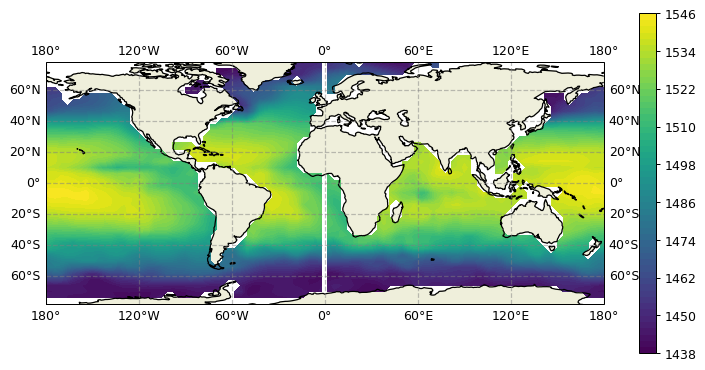

In [20]:
projection = ccrs.PlateCarree()#ccrs.Robinson() 
plt.figure(figsize=(10,5), dpi= 90)

# here is where you specify what projection you want to use
ax = plt.axes(projection=projection)

# here is here you tell Cartopy that the projection
# of your 'x' and 'y' are geographic (lons and lats)
# and that you want to transform those lats and lons
# into 'x' and 'y' in the projection
plt.contourf(lons, lats, tile_to_plot, 60,
             transform=projection);

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                 linewidth=1, color='gray', alpha=0.5, linestyle='--');
ax.coastlines()
ax.add_feature(cfeature.LAND)

plt.colorbar()

<sub>Written by I. Escobar August 2022 </sub>